In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# # place holder in case of wanting to inspect the engine to show properties/ methods
# # if need to use, highlight everything in this line and hit Crl + / for windows and Cmd + / for MacOS

# inspector = inspect(engine)
# dir(inspecto r)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
tables = Base.classes.keys()

In [8]:
# show all of the classes that automap found
tables

['measurement', 'station']

In [9]:
# Save references to each table
station = Base.classes['station']
measurement = Base.classes['measurement']

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# inspect the measurement table to find column names
dir(measurement)[-10:]

['_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'station',
 'tobs']

In [12]:
dir(station)[-10:]

['_sa_raise_deferred_config',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'station']

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# use timedelta to calculate query_date
prp_tpl = session.query(measurement.date, measurement.prcp).all() # list of tuples
last_date = dt.datetime.strptime(prp_tpl[-1][0], '%Y-%m-%d')
# print(last_date, type(last_date))
# print(prp_tpl[-1][0])
# Calculate the date 1 year ago from the last data point in the database & convert data into dataframe
query_date  = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prp_tpl = session.query(measurement.date, measurement.prcp).filter(measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prp_df = pd.DataFrame(prp_tpl,columns=['Date', 'Precipitation'])
prp_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prp_df.sort_index(inplace=True)
prp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [14]:
prp_tpl

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

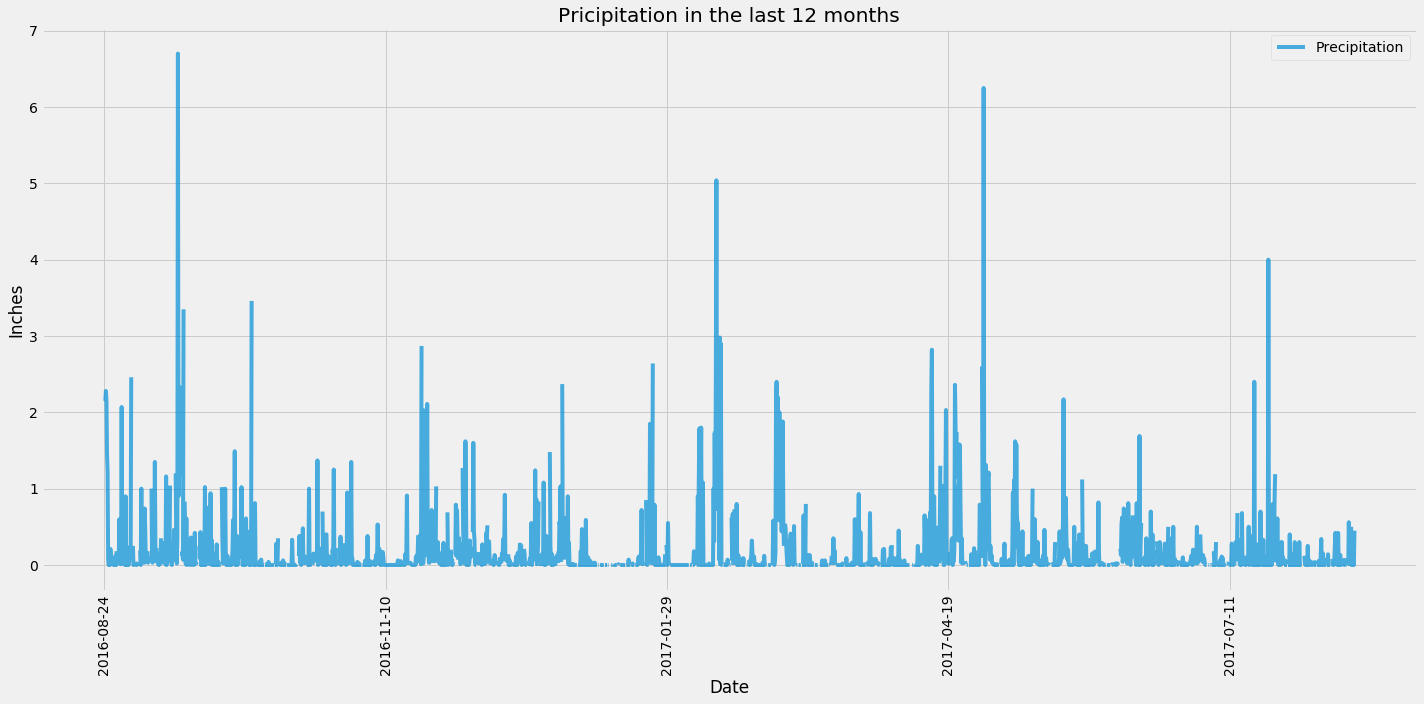

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
prp_df.plot(figsize=(20,10), rot=90, alpha=0.7) # pandas command

# use Matplotlib to decorate
plt.title("Pricipitation in the last 12 months") # create title
plt.xlabel("Date") 
plt.ylabel("Inches")
plt.tight_layout()


# save fig to Images folder
plt.savefig("Images/Precipitation_last1yr.png")

# show all layers on the final charts
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
prp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
print(f'There are total \033[1;34m{session.query(station.id).count()}\033[0m stations in the dataset.')

There are total 9 stations in the dataset.


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
prp_station = session.query(measurement.station,func.count(measurement.station))\
                            .group_by(measurement.station)\
                            .order_by(func.count(measurement.station).desc()).all()


# List the stations and the counts in descending order.
prp_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# observation : 
    # the most active station is the one with highest row counts, since the list was sorted descending, index = 0 is the top station

top_station_id = prp_station[0][0]
topstation_MINtemp = session.query(func.min(measurement.tobs)).filter_by(station = top_station_id).first()[0]
topstation_AVEtemp = round(session.query(func.avg(measurement.tobs)).filter_by(station = top_station_id).first()[0], 0)
topstation_MAXtemp = session.query(func.max(measurement.tobs)).filter_by(station = top_station_id).first()[0]
print(f'>> Most active station : \033[1;31m{top_station_id}\033[0m\n\
    * Min Temperature : {topstation_MINtemp} deg-F\n\
    * Max Temperature : {topstation_MAXtemp} deg-F\n\
    * Average Temperature : {topstation_AVEtemp} deg-F')


>> Most active station : USC00519281
    * Min Temperature : 54.0 deg-F
    * Max Temperature : 85.0 deg-F
    * Average Temperature : 72.0 deg-F


In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 

top_station_tobs = session.query(measurement.date, measurement.tobs)\
    .filter(measurement.station == top_station_id)\
    .filter(measurement.date > query_date).all()

# convert to dataframe for plotting
top_station_tobs_df = pd.DataFrame(top_station_tobs, columns=['Date', 'Temperatures'])
top_station_tobs_df.sort_values('Date', inplace=True)
top_station_tobs_df

,Date,Temperatures
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


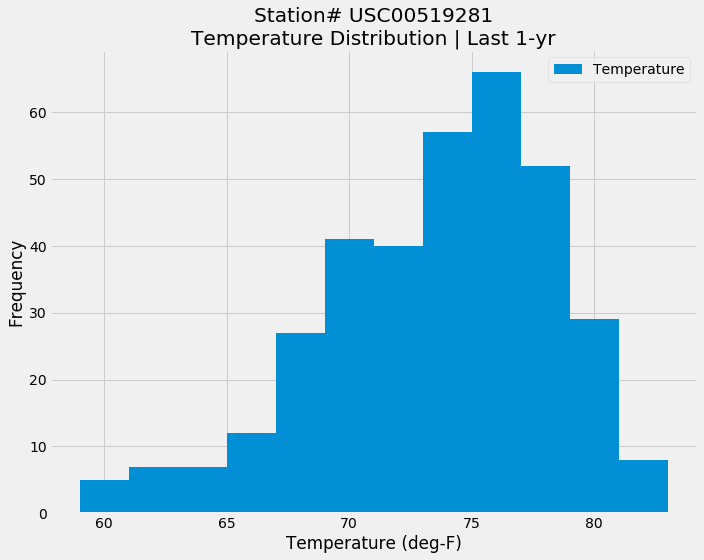

In [21]:
# plot the results as a histogram
top_station_tobs_df.hist(figsize=(10, 8), bins=12)
plt.legend(['Temperature'])
plt.xlabel('Temperature (deg-F)')
plt.ylabel('Frequency')

# I like to build a flexible code where things change when database is changed
# so I create f-string with changeable station name to plot and to export graph
plt.title(f'Station# {top_station_id}\nTemperature Distribution | Last 1-yr')
plt.tight_layout()
plt.savefig(f'Images/{top_station_id}_1yr_Temp.png')
plt.show()

## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).first()



In [23]:
# calculate the tmin, tavg, and tmax using <calc_temps> function
# for trip using the previous year's data for those same dates.
vac_start = '2017-03-02'
vac_end = '2017-03-17'
vac_date = [vac_start, vac_end]
vac_temp = calc_temps(vac_date[0], vac_date[1])
vac_temp

(62.0, 71.23469387755102, 82.0)

In [24]:
# unpack vac_temp
tmin = vac_temp[0]
tavg = vac_temp[1]
tmax = vac_temp[2]

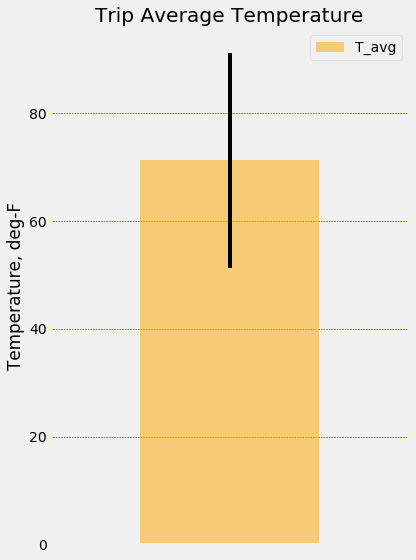

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
err_temp = tmax - tmin
tavg_df = pd.DataFrame({"T_avg" : [tavg]})
tavg_df.plot(kind='bar', yerr=err_temp, figsize=(6,8), alpha=0.5, color='orange')
plt.title("Trip Average Temperature")
plt.ylabel("Temperature, deg-F")
plt.xticks([])
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("Images/VacTempSum.png")
plt.show()

In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

vac_prcp = session.query(measurement.station, func.sum(measurement.prcp))\
                                                .filter(measurement.date >= vac_date[0])\
                                                .filter(measurement.date <= vac_date[1])\
                                                .group_by(measurement.station)\
                                                .order_by(func.sum(measurement.prcp).desc())\
                                                .join(station, station.station == measurement.station)\
                                                .all()
pd.DataFrame(vac_prcp, columns=["Station ID", 'Prcp'])

,Station ID,Prcp
0,USC00513117,3.75
1,USC00519281,3.46
2,USC00519523,2.08
3,USC00519397,1.55
4,USC00516128,1.50
5,USC00514830,0.69
6,USC00517948,0.64


In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("04-07")

[(63.0, 71.10526315789474, 78.0)]

In [47]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
s_date = dt.datetime.strptime(vac_start, '%Y-%m-%d')
e_date = dt.datetime.strptime(vac_end, '%Y-%m-%d')

# create a list and time step 
vac_date_list = []
vac_d_yr_list = []
step = dt.timedelta(days=1)

# loop and find all date range within start and end date
while s_date <= e_date:
        # Stip off the year and save a list of %m-%d strings
        date = dt.datetime.strftime(s_date, "%m-%d")
        d_yr = dt.datetime.strftime(s_date, "%Y-%m-%d")
        vac_date_list.append(date)
        vac_d_yr_list.append(d_yr)
        s_date += step

In [48]:
# Loop through the list of %m-%d strings and calculate the normals for each date
d_norm_tlist = []
for eaday in vac_date_list:
    d_norm_tlist.append(daily_normals(eaday)[0])

d_norm_tlist
d_norm_df = pd.DataFrame(d_norm_tlist, columns = ["Min Temp", "Avg Temp", "Max Temp"]) 
d_norm_df['Date'] = vac_d_yr_list
d_norm_df = d_norm_df[["Date", "Min Temp", "Avg Temp", "Max Temp"]].round(2)

# Convert the 'Date' column into a collection of datetime objects: df.Date
d_norm_df['Date'] = pd.to_datetime(d_norm_df['Date'])

# Set the index to be the converted 'Date' column
d_norm_df.set_index('Date', inplace=True)
d_norm_df

,Min Temp,Avg Temp,Max Temp
Date,,,
2017-03-02,61.0,70.37,78.0
2017-03-03,60.0,70.07,78.0
2017-03-04,57.0,69.27,77.0
2017-03-05,60.0,67.89,76.0
2017-03-06,60.0,69.20,76.0
2017-03-07,60.0,69.17,78.0
2017-03-08,59.0,68.72,78.0
2017-03-09,57.0,68.56,75.0
2017-03-10,57.0,69.12,75.0


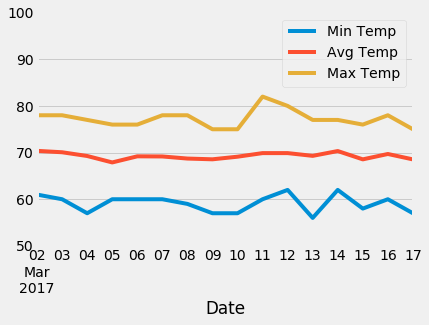

In [49]:
d_norm_df.plot(stacked=False)
plt.ylim(50,100)
plt.show()

In [31]:
# Plot the daily normals as an area plot with `stacked=False`
